# Gross-Pitaevskii equation with magnetism

We solve the 2D Gross-Pitaevskii equation with a magnetic field.
This is similar to the
previous example (Gross-Pitaevskii equation in one dimension),
but with an extra term for the magnetic field.
We reproduce here the results of https://arxiv.org/pdf/1611.02045.pdf Fig. 10

In [1]:
using DFTK
using StaticArrays
using Plots

Unit cell. Having one of the lattice vectors as zero means a 2D system

In [2]:
a = 15
lattice = a .* [[1 0 0.]; [0 1 0]; [0 0 0]];

Confining scalar potential, and magnetic vector potential

In [3]:
pot(x, y, z) = ((x - a/2)^2 + (y - a/2)^2)/2
ω = .6
Apot(x, y, z) = ω * @SVector [y - a/2, -(x - a/2), 0]
Apot(X) = Apot(X...);

Parameters

In [4]:
Ecut = 20  # Increase this for production
η = 500
C = η/2
α = 2
n_electrons = 1;  # Increase this for fun

Collect all the terms, build and run the model

Iter     Function value   Gradient norm 
     0     3.047193e+01     7.077609e+00
 * time: 0.002125978469848633
     1     2.789979e+01     4.138981e+00
 * time: 0.008397102355957031
     2     1.870201e+01     3.429519e+00
 * time: 0.015842914581298828
     3     1.221609e+01     2.484256e+00
 * time: 0.023242950439453125
     4     1.179459e+01     3.032586e+00
 * time: 0.029259920120239258
     5     1.076097e+01     2.392817e+00
 * time: 0.03511810302734375
     6     9.957226e+00     1.455405e+00
 * time: 0.04106903076171875
     7     9.301258e+00     1.325878e+00
 * time: 0.047189950942993164
     8     8.686945e+00     9.592439e-01
 * time: 0.05324602127075195
     9     8.305709e+00     5.847506e-01
 * time: 0.05912208557128906
    10     8.179326e+00     5.181797e-01
 * time: 0.06546688079833984
    11     8.102586e+00     4.785862e-01
 * time: 0.09844398498535156
    12     8.043838e+00     4.969951e-01
 * time: 0.10213398933410645
    13     7.969643e+00     3.776653e-01
 *

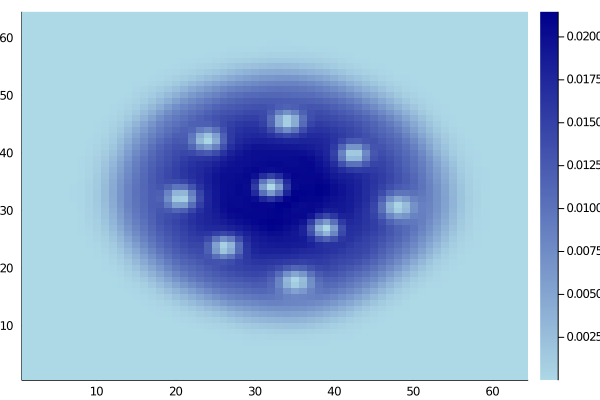

In [5]:
terms = [Kinetic(),
         ExternalFromReal(X -> pot(X...)),
         PowerNonlinearity(C, α),
         Magnetic(Apot),
]
model = Model(lattice; n_electrons=n_electrons,
              terms=terms, spin_polarization=:spinless)  # "spinless electrons"
basis = PlaneWaveBasis(model, Ecut, kgrid=(1, 1, 1))
scfres = direct_minimization(basis, tol=1e-5)  # Reduce tol for production
heatmap(scfres.ρ.real[:, :, 1], c=:blues)